<a href="https://colab.research.google.com/github/mohitpansari7/simulations_of_statistics/blob/main/confidence-interval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
random.seed = 42
import warnings
warnings.filterwarnings("ignore")

import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from prettytable import PrettyTable
from IPython.display import HTML, display
plt.xkcd()

In [43]:
df = pd.read_csv('https://raw.githubusercontent.com/nanthasnk/Black-Friday-Sales-Prediction/master/Data/BlackFridaySales.csv')
print(len(df))
df.head()


550068


User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

In [44]:
purchaseData = np.array(df['Purchase'])
print(len(purchaseData))

550068


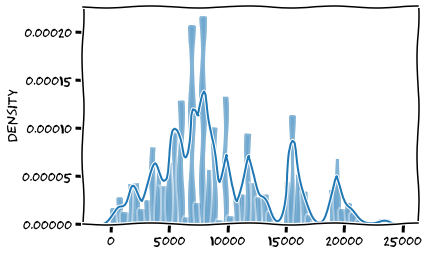

In [45]:
sns.distplot(purchaseData)
plt.show()

In [46]:
purchaseDataMean = np.round(purchaseData.mean(),3)
print(purchaseDataMean)

9263.969


In [47]:
purchaseDataStd = np.round(purchaseData.std(),3)
print(purchaseDataStd)
print(purchaseData.shape[0])

5023.061
550068


In [48]:
samples = random.sample(range(0, purchaseData.shape[0]), 10)
print(samples)
print(purchaseData[samples].mean())

[165720, 277538, 35506, 262737, 548747, 113704, 394712, 310783, 24126, 492069]
7696.8


In [49]:
def getMeanOfNSamplesOfMSizeEach(purchaseData, n, m):
  result = []
  for i in range(0, n):
    samples = random.sample(range(0, purchaseData.shape[0]), m)
    result.append(purchaseData[samples].mean())
  return result


In [50]:
def centralLimitTheorem(data, populationMean, i, j, color, key):
  sns.distplot(np.array(data), color = color, ax=axs[i, j])
  axs[i, j].axvline(populationMean, linestyle='--', color='r', label = 'p-mean')
  axs[i, j].axvline(np.array(data).mean(), linestyle='-.', color = 'b', label = 's-mean')
  axs[i, j].set_title(key)
  axs[i, j].legend()

In [51]:
sampleMeans = dict()

In [52]:
sampleMeans['100Sample-50Elem'] = getMeanOfNSamplesOfMSizeEach(purchaseData, 100, 50)
sampleMeans['1000Sample-50Elem'] = getMeanOfNSamplesOfMSizeEach(purchaseData, 1000, 50)

sampleMeans['100Sample-100Elem'] = getMeanOfNSamplesOfMSizeEach(purchaseData, 100, 100)
sampleMeans['1000Sample-100Elem'] = getMeanOfNSamplesOfMSizeEach(purchaseData, 1000, 100)

sampleMeans['100Sample-1000Elem'] = getMeanOfNSamplesOfMSizeEach(purchaseData, 100, 1000)
sampleMeans['1000Sample-1000Elem'] = getMeanOfNSamplesOfMSizeEach(purchaseData, 1000, 1000)

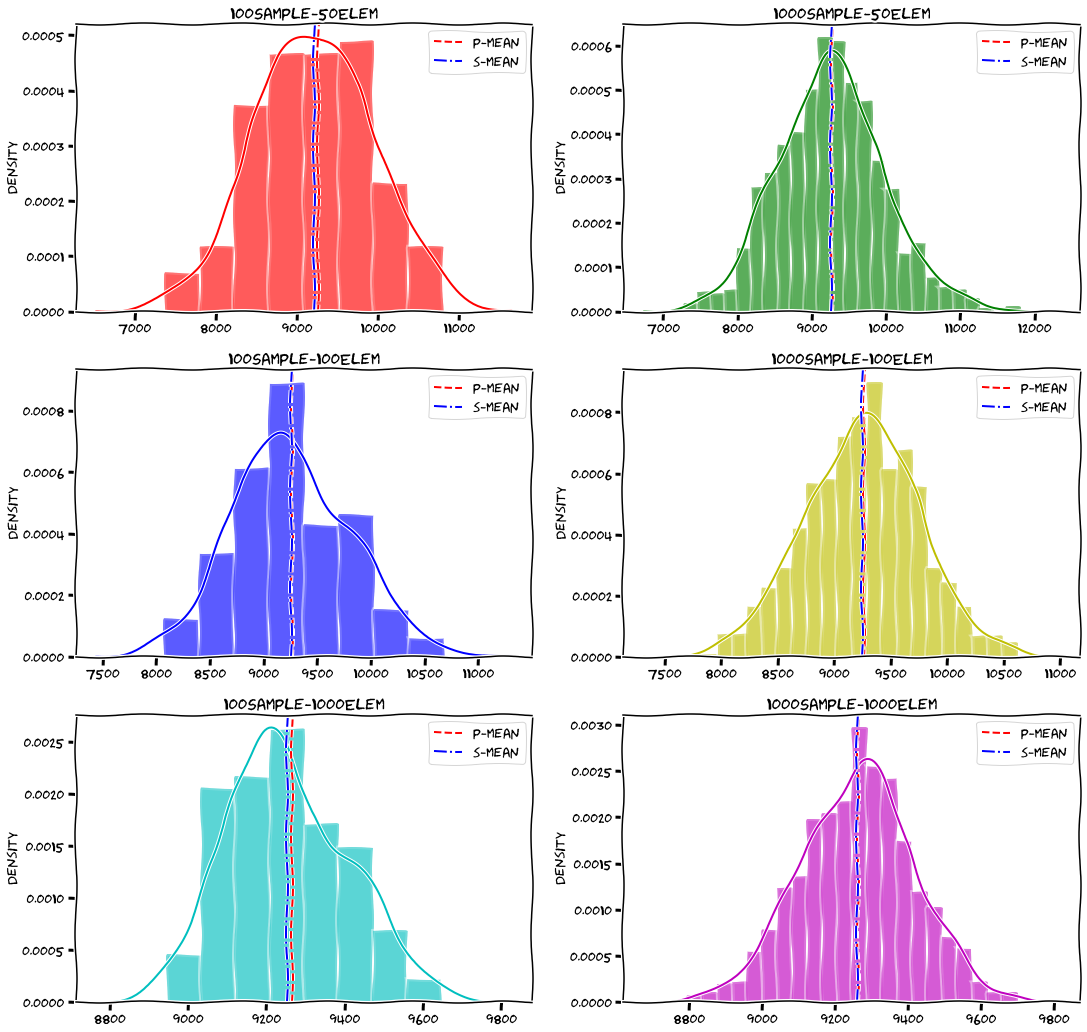

In [53]:
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k']
pltGrid = [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1)]
sampleSize = [(100, 50), (1000, 50), (100,100), (1000,100), (100,1000), (1000,1000)]

fig, axs = plt.subplots(3, 2, figsize=(18,18))
for i, key in enumerate(sampleMeans.keys()):
  centralLimitTheorem(sampleMeans[key], purchaseDataMean, pltGrid[i][0], pltGrid[i][1], colors[i], key)
plt.show()

In [54]:
x = PrettyTable()
x = PrettyTable(["#sampleName", "PMean", "SMean", "PStd", "SStd", "mux~mu", "stdx~std/root-n"])

for i, key in enumerate(sampleMeans.keys()):
  sampleMean = np.round(np.array(sampleMeans[key]).mean(), 3)
  sampleStd = np.round(np.array(sampleMeans[key]).std(), 3)
  popSts = np.round(purchaseDataStd/np.sqrt(sampleSize[i][1]), 3)

  row = []

  row.append(key)
  row.append(purchaseDataMean)
  row.append(sampleMean)
  row.append(purchaseDataStd)
  row.append(sampleStd)
  row.append(str(sampleMean)+"~"+str(purchaseDataMean))
  row.append(str(sampleStd)+"~"+str(purchaseDataStd))
  x.add_row(row)
print(x)

+---------------------+----------+----------+----------+---------+-------------------+------------------+
|     #sampleName     |  PMean   |  SMean   |   PStd   |   SStd  |       mux~mu      | stdx~std/root-n  |
+---------------------+----------+----------+----------+---------+-------------------+------------------+
|   100Sample-50Elem  | 9263.969 | 9210.012 | 5023.061 |  702.37 | 9210.012~9263.969 | 702.37~5023.061  |
|  1000Sample-50Elem  | 9263.969 | 9260.421 | 5023.061 | 705.338 | 9260.421~9263.969 | 705.338~5023.061 |
|  100Sample-100Elem  | 9263.969 | 9255.974 | 5023.061 | 524.417 | 9255.974~9263.969 | 524.417~5023.061 |
|  1000Sample-100Elem | 9263.969 | 9244.685 | 5023.061 | 496.787 | 9244.685~9263.969 | 496.787~5023.061 |
|  100Sample-1000Elem | 9263.969 | 9252.949 | 5023.061 | 149.364 | 9252.949~9263.969 | 149.364~5023.061 |
| 1000Sample-1000Elem | 9263.969 | 9260.228 | 5023.061 | 154.315 | 9260.228~9263.969 | 154.315~5023.061 |
+---------------------+----------+----------+-

In [55]:
dataMale = np.array(df[df['Gender']=='M']['Purchase'].values)
print(dataMale)

[ 7969 15227 19215 ...   494   473   368]


In [56]:
samples = random.sample(range(0, dataMale.shape[0]), 100)
print(samples)

[364767, 274835, 72612, 199942, 408061, 232272, 271683, 59547, 55626, 276154, 309494, 226412, 286015, 392311, 33587, 291477, 145689, 322902, 52218, 112429, 282633, 392846, 209279, 10612, 389205, 25219, 282661, 36654, 225584, 98542, 21214, 170475, 102789, 186654, 121861, 323857, 163449, 169008, 243087, 383263, 319657, 32390, 215203, 361990, 66896, 116309, 360597, 214679, 51209, 16489, 356964, 296076, 163679, 159550, 412693, 271815, 324640, 31815, 61897, 10011, 351107, 158536, 400128, 190663, 355989, 74674, 339385, 227818, 211314, 139742, 341276, 16432, 102555, 361382, 106491, 131189, 370867, 326898, 387857, 263404, 292549, 316797, 152200, 102866, 140665, 193194, 136034, 322661, 127228, 366997, 197262, 43791, 219540, 261827, 324662, 308203, 68182, 118475, 27594, 20152]


In [57]:
print('mean of money spent by sample set of 100 male', dataMale[samples].mean())

mean of money spent by sample set of 100 male 9632.54


In [58]:
print('population std is', purchaseDataStd)

population std is 5023.061


In [59]:
print('std of sampling dist of sample mean is ', purchaseDataStd/10)

std of sampling dist of sample mean is  502.30609999999996


In [60]:
def plotConfidenceInterval(data, sampleMean, popStd, i, j, color):
  sns.distplot(data, color = color, ax=axs[i,j])
  axs[i,j].axvline(data.mean(), linestyle="-", color = 'k', label = 'p-mean')
  axs[i,j].axvline(sampleMean, linestyle="--", color = 'm', label = 's-mean')
  axs[i,j].axvline(sampleMean + 2*(popStd/np.sqrt(100)), linestyle=":", color = 'g', label = 's-mean+2*SE')
  axs[i,j].axvline(sampleMean - 2*(popStd/np.sqrt(100)), linestyle=":", color = 'g', label = 's-mean-2*SE')
  axs[i,j].legend()

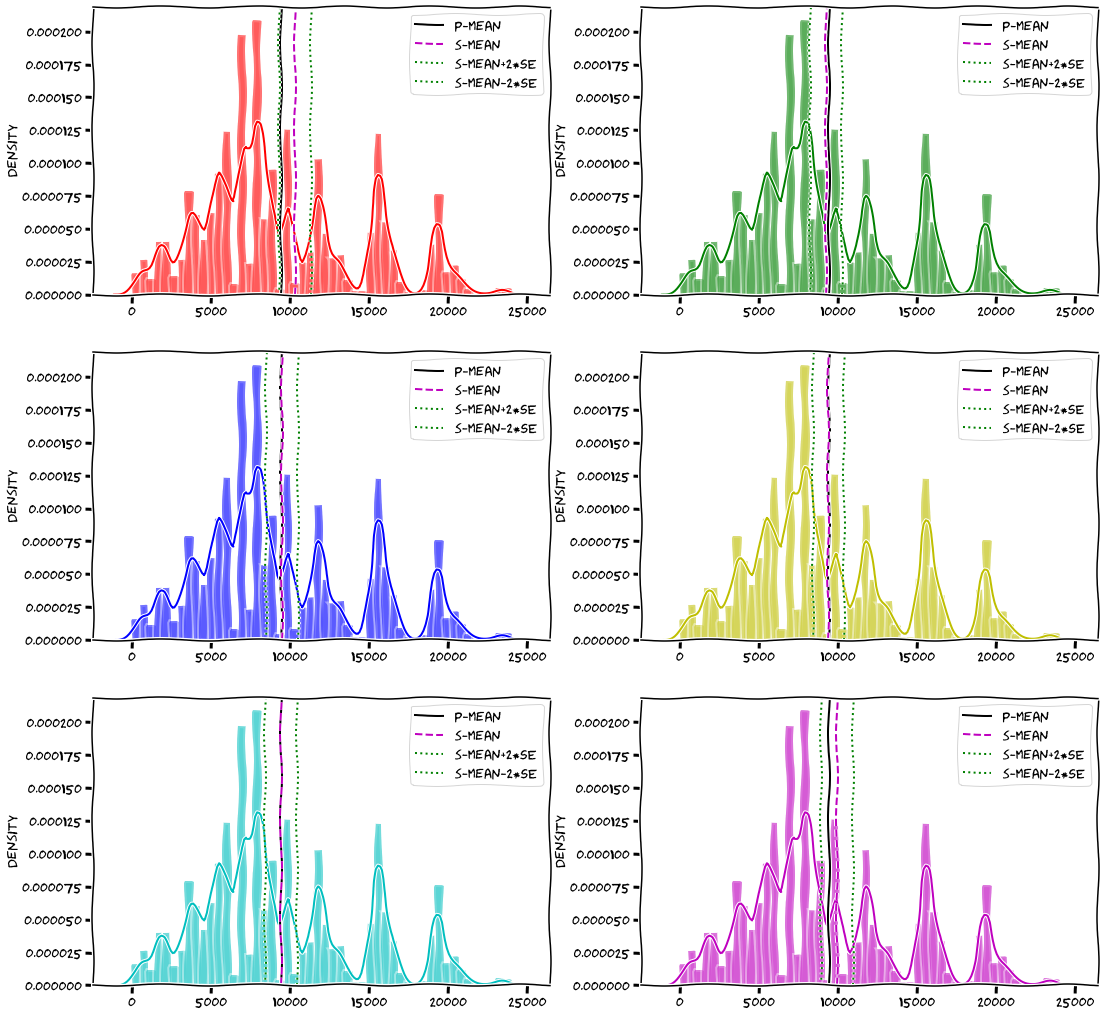

In [61]:
fig, axs = plt.subplots(3,2,figsize=(18, 18))
for i in range(6):
  sample = dataMale[random.sample(range(0, dataMale.shape[0]), 100)]
  plotConfidenceInterval(dataMale, np.array(sample).mean(), purchaseDataStd, pltGrid[i][0], pltGrid[i][1], colors[i] )
plt.show()